In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [514]:
df = pd.read_csv(r'data.csv', index_col = 'ID')

In [515]:
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [516]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

normalizing the "Height" and "Weight" columns

In [517]:
df['Height'] = df['Height'].fillna(df['Height'].mode()[0])
df['Height'] = df['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54)


df['Weight'] = df['Weight'].str.replace('lbs', '')
df['Weight'].fillna((df['Weight'].median()), inplace = True)
df['Weight'] = df['Weight'].astype(float)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Photo                     18207 non-null  object 
 3   Nationality               18207 non-null  object 
 4   Flag                      18207 non-null  object 
 5   Overall                   18207 non-null  int64  
 6   Potential                 18207 non-null  int64  
 7   Club                      17966 non-null  object 
 8   Club Logo                 18207 non-null  object 
 9   Value                     18207 non-null  object 
 10  Wage                      18207 non-null  object 
 11  Special                   18207 non-null  int64  
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  

In [486]:
def function(val):
    dict ={
        "K": 1000,
        "M": 1000000
    }
    
    if val[-1] in dict:
        symbol = val[-1]
        num = val[1:-1]
        
        return float(num) * dict[symbol]


df['Value'] = df['Value'].apply(function)
df['Wage']  = df['Wage'].apply(function)

Converting "Value" and "Wage" columns into numbers

In [487]:
df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,1.795500e+04,17966.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,2.444530e+06,9861.850161,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,5.626715e+06,22117.273534,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,3.250000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,2.100000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [488]:
df.isnull().sum()

Name                 0
Age                  0
Photo                0
Nationality          0
Flag                 0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 87, dtype: int64

There are somu NULL values in the dataset

In [489]:
df.duplicated().sum()

0

no duplicates in the dataset

## PLAYER WITH THE HIGHEST VALUE

In [456]:
df.loc[df['Value'] == df['Value'].max()]['Name']


ID
190871    Neymar Jr
Name: Name, dtype: object

## PLAYER WITH THE HIGHEST WAGE

In [457]:
df.loc[df['Wage'] == df['Wage'].max()]['Name']


ID
158023    L. Messi
Name: Name, dtype: object

## PLAYER WITH THE HIGHEST OVERALL

In [458]:
df.loc[df['Overall'] == df['Overall'].max()]['Name']


ID
158023             L. Messi
20801     Cristiano Ronaldo
Name: Name, dtype: object

## PLAYER WITH THE HIGHEST POTENTIAL

In [459]:
df.loc[df['Potential'] == df['Potential'].max()]['Name']


ID
231747    K. Mbappé
Name: Name, dtype: object

## PREFERRED FOOT

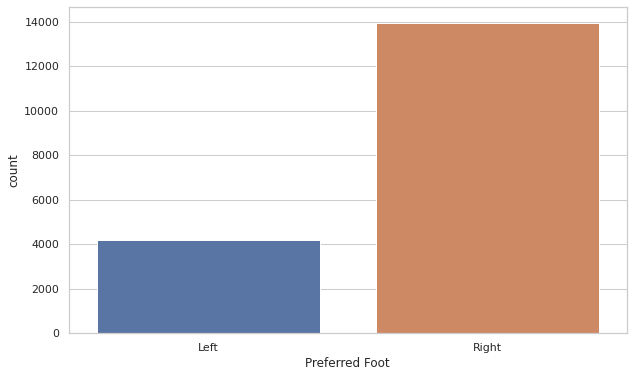

In [460]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'Preferred Foot', data=df)
plt.show()

## NUMBER OF PLAYERS BY POSITION

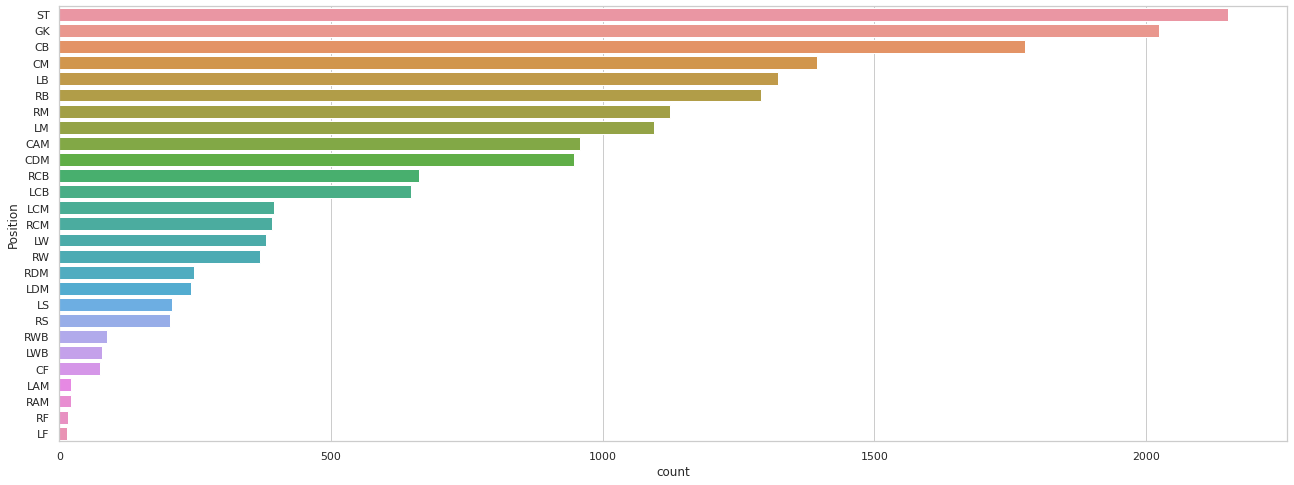

In [461]:
plt.figure(figsize=(22,8))

sns.countplot(y = 'Position', data=df, order = df['Position'].value_counts().index)
plt.show()

In [462]:
df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

Looks like some players have unique body types. We also found a "PLAYER_BODY_TYPE_25". Let's see which player has that body type:

In [463]:
df.loc[df['Body Type'] == 'PLAYER_BODY_TYPE_25']['Name']

ID
209331    M. Salah
Name: Name, dtype: object

Plotting only 'Lean','Stocky','Normal' body types

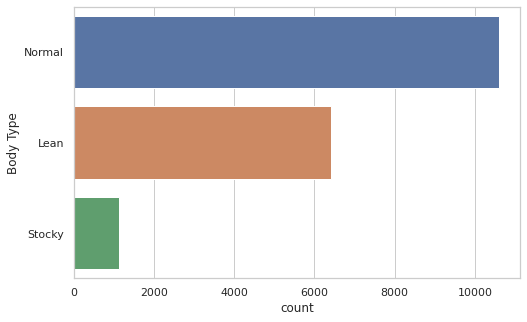

In [464]:
plt.figure(figsize=(8,5))

df1 = df.loc[df['Body Type'].isin(['Lean','Stocky','Normal'])]
sns.countplot(y = 'Body Type', data= df1, order = df1['Body Type'].value_counts().index)
plt.show()

## TOP 10 PLAYERS BY OVERALL

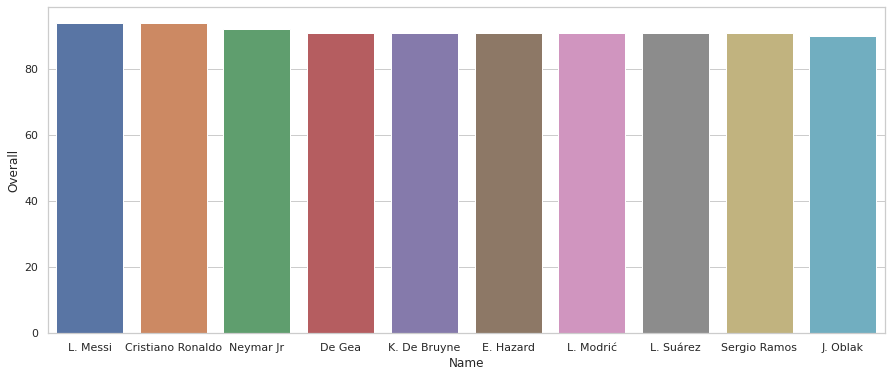

In [465]:
plt.figure(figsize=(15,6))
df1 = df.sort_values('Overall',ascending = False)

sns.barplot(x = df['Name'][:10], y = df1['Overall'])
plt.show()

## TOP 10 TEAMS BY COMPLESSIVE OVERALL

/home/ale/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


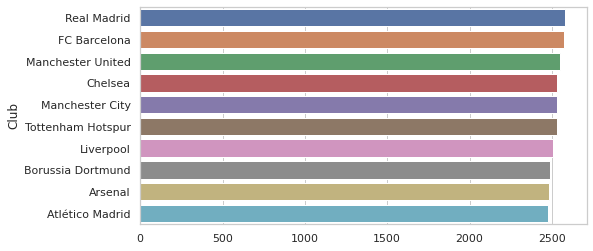

In [466]:
plt.figure(figsize=(8,4))
df1 = df.groupby('Club')['Overall'].sum().sort_values(ascending= False)[:10]

sns.barplot(df1.values, df1.index)
plt.show()

## TOP 10 NATIONAL TEAMS BY COMPLESSIVE OVERALL

/home/ale/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


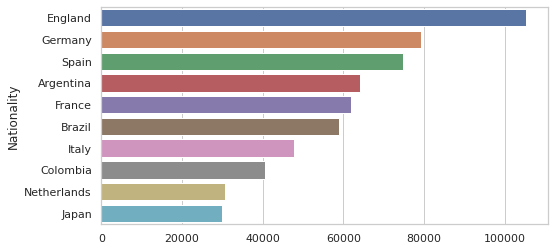

In [467]:
plt.figure(figsize=(8,4))
df1 = df.groupby('Nationality')['Overall'].sum().sort_values(ascending= False)[:10]

sns.barplot(df1.values, df1.index)
plt.show()

## PIE CHART OF NUMBER OF PLAYERS BY NATIONALITY

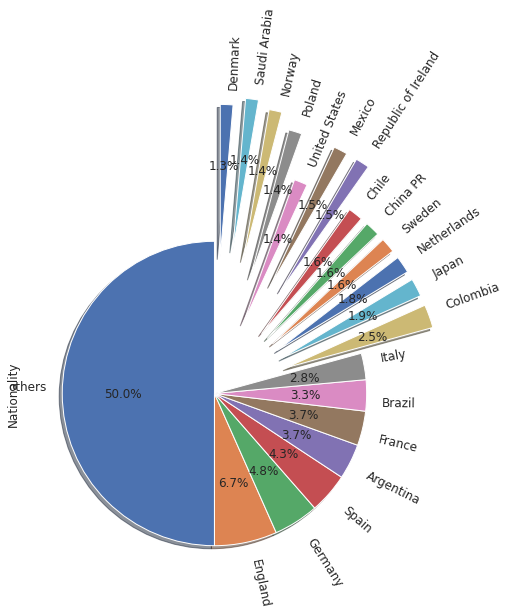

In [468]:
df1 = pd.DataFrame(data = df['Nationality'].value_counts()).reset_index()
new_row = {  ## creating new row to aggregate all the nations who have a smaller number of players
    
    'index': 'others',
    'Nationality': df1['Nationality'][:20].sum()
}

df1 = df1.append(new_row, ignore_index= True).sort_values('Nationality', ascending = False)



explode = [0,0,0,0,0,0,0,0, 0.5,0.5,0.5,0.5,0.5,0.5,0.8,0.8,0.5,0.8,0.9,0.95,0.9]
df1[:21].plot(kind='pie', y = 'Nationality', autopct='%1.1f%%', startangle=90, explode=explode, 
              shadow=True, labels=df1['index'], legend = False,
              fontsize=12, figsize=(7,7), rotatelabels=True )

plt.show()

## PLAYERS WITH THE HIGHEST WAGES

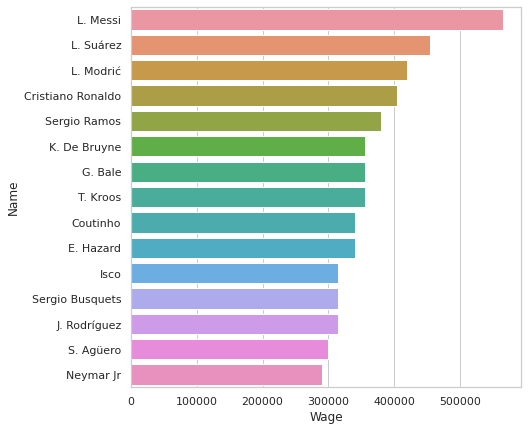

In [469]:
df1 = df.sort_values('Wage', ascending=False)[:15]

plt.figure(figsize=(7,7))
sns.barplot(x = 'Wage', y = 'Name', data = df1)

plt.show()

## WAGE VS OVERALL

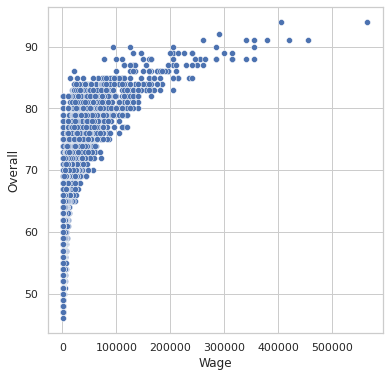

In [470]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Wage', y = 'Overall', data = df)

plt.show()

## WAGE VS POTENTIAL

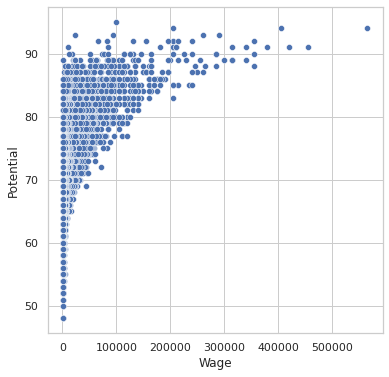

In [471]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Wage', y = 'Potential', data = df)

plt.show()

## WAGE VS VALUE

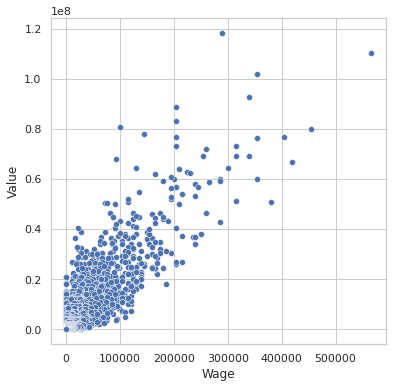

In [472]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Wage', y = 'Value', data = df)

plt.show()

## POTENTIAL VS OVERALL

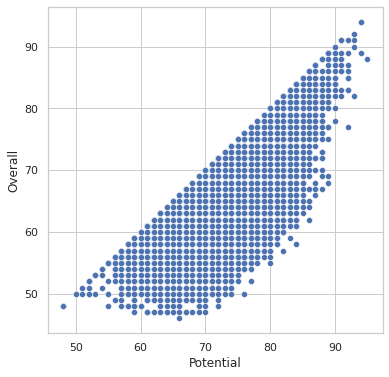

In [473]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'Potential', y = 'Overall', data = df)

plt.show()

## HIGHEST OVERALL FOR EACH POSITION

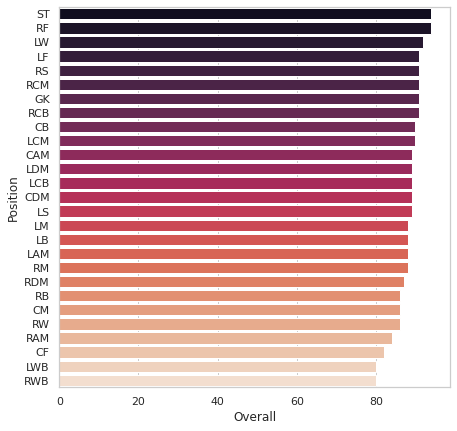

In [474]:
df1 = df.groupby('Position')['Overall'].max().sort_values(ascending = False).reset_index()


plt.figure(figsize = (7,7))
sns.barplot(x = 'Overall', y = 'Position', data = df1, palette = 'rocket')

plt.show()

## DISTRIBUTION OF POTENTIAL

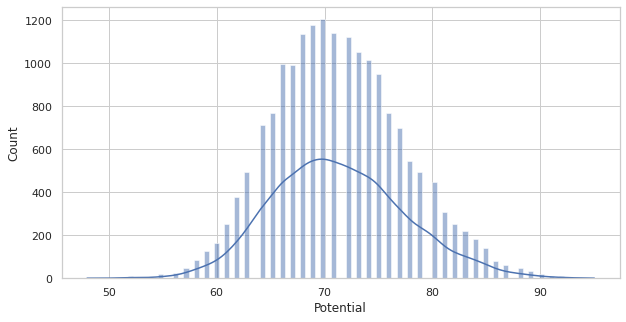

In [475]:
plt.figure(figsize = (10,5) )


sns.histplot(data = df, x = 'Potential', bins = 100, kde = True)
plt.show()

## DISTRIBUTION OF OVERALL

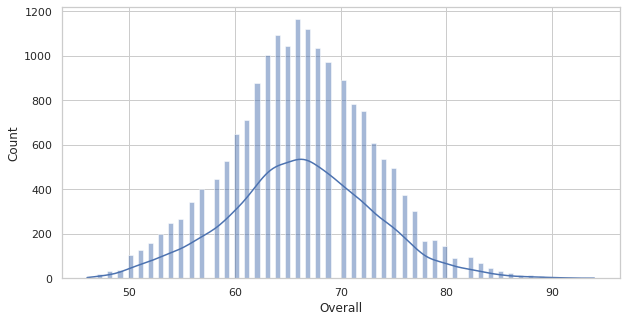

In [476]:
plt.figure(figsize = (10,5) )


sns.histplot(data = df, x = 'Overall', bins = 100, kde = True)
plt.show()

## CORRELATION BETWEEN ATTRIBUTES

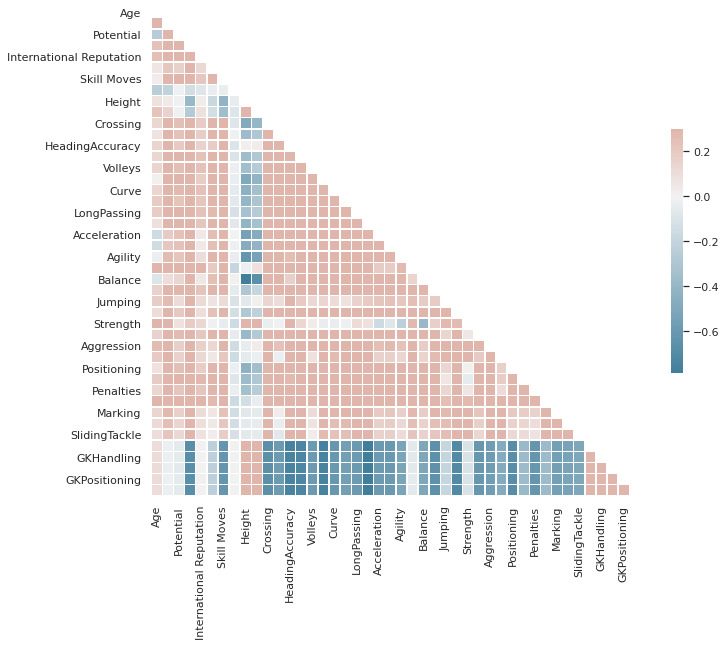

In [526]:
sns.set_theme(style="whitegrid")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()